In [1]:
import torch
import skimage
import cv2
import torchvision
import matplotlib.pyplot as plt

In [2]:
path = r"D:\PyTorch\Project_6_CityScapes_Segmentation\input\archive_1\cityscapes_data\train\15.jpg"

In [3]:
mode = torchvision.io.image.ImageReadMode.RGB

In [4]:
image = torchvision.io.read_image(path, mode)

In [5]:
image.shape

torch.Size([3, 256, 512])

In [6]:
img1 = image.permute(1, 2, 0)

In [7]:
img1 = image[:, :, :256]
img2 = image[:, :, 256:]

In [8]:
img1.shape

torch.Size([3, 256, 256])

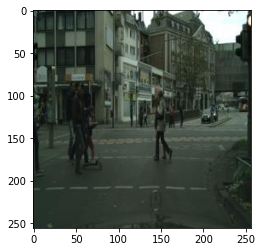

In [9]:
plt.imshow(img1.permute(1, 2, 0))

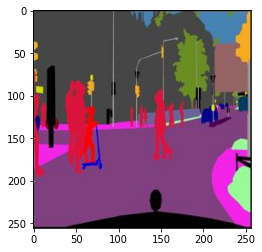

In [10]:
plt.imshow(img2.permute(1, 2, 0))

In [11]:
img2.shape

torch.Size([3, 256, 256])

**Read files**

In [12]:
voc_dir_train = r"D:\PyTorch\Project_6_CityScapes_Segmentation\input\archive_1\cityscapes_data\train"
voc_dir_test = r"D:\PyTorch\Project_6_CityScapes_Segmentation\input\archive_1\cityscapes_data\val"
def list_files(dir):
    import os
    files = []
    for file in os.listdir(dir):
        if file.endswith(".jpg"):
            files.append(file)
    return files
files_train = list_files(voc_dir_train)
files_test = list_files(voc_dir_test)
print(f"Reading {len(files_train)} train files and {len(files_test)} test files")

Reading 2975 train files and 500 test files


In [13]:
%matplotlib inline
import os
import torch
import torchvision
from d2l import torch as d2l



def read_voc_images(voc_dir, files):
    """Read all VOC feature and label images."""

    mode = torchvision.io.image.ImageReadMode.RGB

    features, labels = [], []
    for i, fname in enumerate(files):
        image = torchvision.io.read_image(os.path.join(voc_dir, fname), mode)
        feature = image[:, :, :256]
        label = image[:, :, 256:]
        features.append(feature)
        labels.append(label)

    return(features, labels)

torch.Size([3, 256, 256])
torch.Size([256, 256, 3]) torch.Size([3, 256, 256])


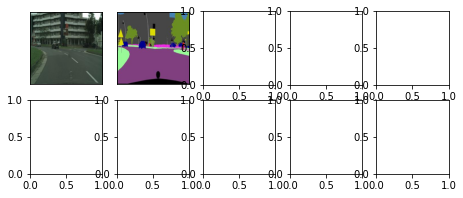

In [14]:
train_features, train_labels = read_voc_images(voc_dir_train, files_train)
n = 5
imgs = train_features[:1] + train_labels[:1]
print(imgs[0].shape)
imgs = [img.permute(1,2,0) for img in imgs]
print(imgs[0].shape, train_labels[0].shape)
d2l.show_images(imgs, 2, 5);

In [15]:
train_labels[0][:,1,25]

tensor([43, 52, 61], dtype=torch.uint8)

In [16]:
for i in range(100):
    print(img2[:,i,2])

tensor([2, 2, 2], dtype=torch.uint8)
tensor([46, 46, 46], dtype=torch.uint8)
tensor([74, 74, 74], dtype=torch.uint8)
tensor([74, 74, 74], dtype=torch.uint8)
tensor([72, 72, 72], dtype=torch.uint8)
tensor([70, 70, 70], dtype=torch.uint8)
tensor([71, 71, 71], dtype=torch.uint8)
tensor([77, 77, 77], dtype=torch.uint8)
tensor([73, 73, 73], dtype=torch.uint8)
tensor([73, 73, 73], dtype=torch.uint8)
tensor([73, 73, 73], dtype=torch.uint8)
tensor([73, 73, 73], dtype=torch.uint8)
tensor([73, 73, 73], dtype=torch.uint8)
tensor([73, 73, 73], dtype=torch.uint8)
tensor([73, 73, 73], dtype=torch.uint8)
tensor([73, 73, 73], dtype=torch.uint8)
tensor([73, 73, 73], dtype=torch.uint8)
tensor([73, 73, 73], dtype=torch.uint8)
tensor([73, 73, 73], dtype=torch.uint8)
tensor([73, 73, 73], dtype=torch.uint8)
tensor([73, 73, 73], dtype=torch.uint8)
tensor([73, 73, 73], dtype=torch.uint8)
tensor([73, 73, 73], dtype=torch.uint8)
tensor([73, 73, 73], dtype=torch.uint8)
tensor([73, 73, 73], dtype=torch.uint8)
ten

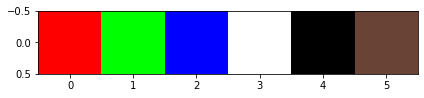

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
palette = np.array([[255,   0,   0], # index 0: red
                    [  0, 255,   0], # index 1: green
                    [  0,   0, 255], # index 2: blue
                    [255, 255, 255], # index 3: white
                    [  0,   0,   0], # index 4: black
                    [ 105,  67,  54], # index 5: yellow
                                   ], dtype=np.uint8)

#indices = np.random.randint(0, len(palette), size=(4, 6))
indices = np.array([[0, 1, 2, 3, 4, 5]])
io.imshow(palette[indices])

In [18]:
import os
os.getcwd()

'D:\\PyTorch\\Project_6_CityScapes_Segmentation\\notebooks'

In [19]:
VOC_COLORMAP = [[128,  64, 128],
 [244,  35, 232],
 [ 70,  70,  70],
 [102, 102, 156],
 [190, 153, 153],
 [153, 153, 153],
 [250, 170,  30],
 [220, 220,   0],
 [107, 142,  35],
 [152, 251, 152],
 [ 70, 130, 180],
 [220,  20,  60],
 [255,   0,   0],
 [  0,   0, 142],
 [  0,   0,  70],
 [  0,  60, 100],
 [  0,  80, 100],
 [  0,   0, 230],
 [119,  11,  32],
 [  0,   0,   0],
 [255, 255, 255]]

VOC_CLASSES = ['static', 'dynamic', 'ground', 'road', 'sidewalk', 'parking', 'rail track', 'building', 'wall', 'fence', 'guard rail', 'bridge', 'tunnel', 'pole', 'polegroup', 'traffic light', 'traffic sign', 'vegetation', 'terrain', 'sky', 'person',]

In [20]:
import pandas as pd
df = pd.read_csv(r'../input/labels/colormap_labels.csv')
VOC_CLASSES = list(df['Class'])
VOC_COLORMAP = []
for x,y,z in zip(df['R'], df['G'], df['B']):
    VOC_COLORMAP.append([x,y,z])

In [21]:
print(VOC_COLORMAP, VOC_CLASSES)

[[0, 0, 0], [111, 74, 0], [81, 0, 81], [128, 64, 128], [244, 35, 232], [250, 170, 160], [230, 150, 140], [70, 70, 70], [102, 102, 156], [190, 153, 153], [180, 165, 180], [150, 100, 100], [150, 120, 90], [153, 153, 153], [153, 153, 153], [250, 170, 30], [220, 220, 0], [107, 142, 35], [152, 251, 152], [70, 130, 180], [220, 20, 60], [255, 0, 0], [0, 0, 142], [0, 0, 70], [0, 60, 100], [0, 0, 90], [0, 0, 110], [0, 80, 100], [0, 0, 230], [119, 11, 32]] ['static', 'dynamic', 'ground', 'road', 'sidewalk', 'parking', 'rail track', 'building', 'wall', 'fence', 'guard rail', 'bridge', 'tunnel', 'pole', 'polegroup', 'traffic light', 'traffic sign', 'vegetation', 'terrain', 'sky', 'person', 'rider', 'car', 'truck', 'bus', 'caravan', 'trailer', 'train', 'motorcycle', 'bicycle']


In [22]:
len(VOC_CLASSES), len(VOC_COLORMAP)

(30, 30)

In [23]:
"""Build the mapping from RGB to class indices for VOC labels."""
def voc_colormap2label():
    colormap2label = torch.zeros(256 ** 3, dtype=torch.long)
    #print(colormap2label)
    for i, colormap in enumerate(VOC_COLORMAP):
       # print(colormap, i, (colormap[0] * 256 + colormap[1]) * 256 + colormap[2])
        colormap2label[(colormap[0] * 256 + colormap[1]) * 256 + colormap[2]] = i
    return colormap2label

In [24]:
def voc_label_indices(colormap, colormap2label):
    """Map any RGB values in VOC labels to their class indices."""
    colormap = colormap.permute(1, 2, 0).numpy().astype('int32')
    idx = ((colormap[:, :, 0] * 256 + colormap[:, :, 1]) * 256+ colormap[:, :, 2])
    return colormap2label[idx]

In [25]:
def voc_rand_crop(feature, label, height, width):
    # print("Randomly crop both feature and label images")
    # print(feature.shape, label.shape)
    rect = torchvision.transforms.RandomCrop.get_params(feature, (height, width))
    feature = torchvision.transforms.functional.crop(feature, *rect)
    label = torchvision.transforms.functional.crop(label, *rect)
    return feature, label


In [57]:
#Custom Segmentation class dataset
class VOCSegDataset(torch.utils.data.Dataset):
    """A customized dataset to load the VOC dataset."""
    def __init__(self, files, crop_size, voc_dir):
        self.transform = torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        self.crop_size = crop_size
        features, labels = read_voc_images(voc_dir, files)
        self.features = [self.normalize_image(feature) for feature in self.filter(features)]
        self.labels = self.filter(labels)
        self.colormap2label = voc_colormap2label()
        print('read ' + str(len(self.features)) + ' examples')
        
    def normalize_image(self, img):
        return self.transform(img.float() / 255)
    
    def filter(self, imgs):
        return [img for img in imgs if (img.shape[1] >= self.crop_size[0] and img.shape[2] >= self.crop_size[1])]
    
    def __getitem__(self, idx):
        feature, label = voc_rand_crop(self.features[idx], self.labels[idx], *self.crop_size)
#         return (feature, voc_label_indices(label, self.colormap2label))
        return (feature, label / 255.0)

    def __len__(self):
        return len(self.features)

In [58]:
crop_size = (224, 224)
voc_train = VOCSegDataset(files_train, crop_size, voc_dir_train)
voc_test = VOCSegDataset(files_test, crop_size, voc_dir_test)
batch_size = 16
train_iter = torch.utils.data.DataLoader(voc_train, batch_size, shuffle=True, drop_last=True,)
test_iter = torch.utils.data.DataLoader(voc_test, batch_size, shuffle=False, drop_last=True,)

read 2975 examples
read 500 examples


In [59]:
x = voc_train.labels[0]
x.shape

torch.Size([3, 256, 256])

In [60]:
images_b, labels_b = next(iter(test_iter))
images_b[0].shape, labels_b[0].shape

(torch.Size([3, 224, 224]), torch.Size([3, 224, 224]))

In [61]:
image1, label1 = images_b[0], labels_b[0]
image1.shape, label1.shape

(torch.Size([3, 224, 224]), torch.Size([3, 224, 224]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


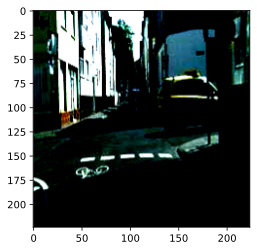

In [62]:
image1 = image1.permute(1, 2, 0)
plt.imshow(image1)

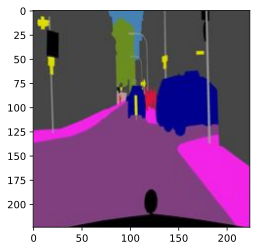

In [63]:
label1 = label1.permute(1, 2, 0)
plt.imshow(label1)

In [64]:
import torch
import torchvision
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l
import warnings
warnings.filterwarnings('ignore')

In [65]:
pretrained_net = torchvision.models.resnet18(pretrained=True)
net = nn.Sequential(*list(pretrained_net.children())[:-2])
num_classes = 3
net.add_module('final_conv', nn.Conv2d(512, num_classes, kernel_size=1))
net.add_module('transpose_conv', nn.ConvTranspose2d(num_classes, num_classes,
kernel_size=64, padding=16, stride=32))

In [66]:
def bilinear_kernel(in_channels, out_channels, kernel_size):
    factor = (kernel_size + 1) // 2
    if kernel_size % 2 == 1:
        center = factor - 1
    else:
        center = factor - 0.5
    og = (torch.arange(kernel_size).reshape(-1, 1),torch.arange(kernel_size).reshape(1, -1))
    
    filt = (1 - torch.abs(og[0] - center) / factor) * (1 - torch.abs(og[1] - center) / factor)
    weight = torch.zeros((in_channels, out_channels,
    kernel_size, kernel_size))
    weight[range(in_channels), range(out_channels), :, :] = filt
    return weight
bilinear_kernel(3, 3, 4).shape

torch.Size([3, 3, 4, 4])

In [67]:
W = bilinear_kernel(num_classes, num_classes, 64)
net.transpose_conv.weight.data.copy_(W);

In [59]:
def loss(inputs, targets):
    return F.cross_entropy(inputs, targets, reduction='none').mean(1).mean(1)

In [68]:
loss = nn.BCEWithLogitsLoss()

RuntimeError: The size of tensor a (16) must match the size of tensor b (3) at non-singleton dimension 1

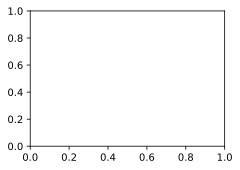

In [69]:
num_epochs, lr, wd, devices = 2, 0.001, 1e-3, d2l.try_all_gpus()
trainer = torch.optim.SGD(net.parameters(), lr=lr, weight_decay=wd)
d2l.train_ch13(net, train_iter, test_iter, loss, trainer, num_epochs, devices)

In [155]:
torch.save({ 
    'model_state_dict': net.state_dict(),
    'optimizer_state_dict': trainer.state_dict(),
    }, r"..\models\best_city_scape2.pt")

In [57]:
path = r"..\models\best_city_scape2.pt"
checkpoint = torch.load(path)
net.load_state_dict(checkpoint['model_state_dict'])

# devices = d2l.try_all_gpus()
# net = nn.DataParallel(net, device_ids=devices).to(devices[0])
# net.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [58]:
net = net.eval()

In [26]:
def predict(img):
    X = test_iter.dataset.normalize_image(img).unsqueeze(0)
    pred = net(X).argmax(dim=1)
    return pred.reshape(pred.shape[1], pred.shape[2])
def label2image(pred):
    colormap = torch.tensor(VOC_COLORMAP,)
    X = pred.long()
    return colormap[X, :]

In [83]:
path = r"D:\PyTorch\Project_6_CityScapes_Segmentation\input\archive_1\cityscapes_data\val\26.jpg"

In [84]:
image = torchvision.io.read_image(path, mode)
feature = image[:, :, :256]
label = image[:, :, 256:]

In [ ]:
label.shape, feature.shape, net(feature.cuda()).shape

In [76]:
label_clrmap = voc_label_indices(label, voc_colormap2label())

In [77]:
from PIL import Image
n = 1
crop_rect = (0, 0, 224, 224)
# X = torchvision.transforms.functional.crop(feature, *crop_rect)
pred = label2image(predict(feature))
pred2 = label2image(label_clrmap)
#imgs += [X.permute(1,2,0), pred.cpu(),]
#d2l.show_images(imgs[::3] + imgs[1::3] + imgs[2::3], 3, n, scale=2);

In [78]:
pred2.shape

torch.Size([256, 256, 3])

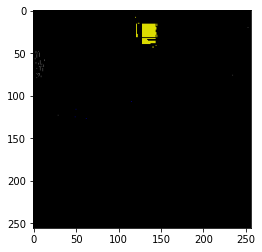

In [79]:
import matplotlib.pyplot as plt
plt.imshow(pred2)

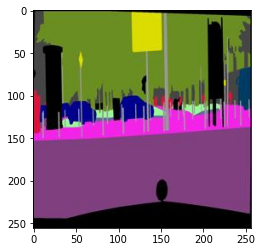

In [80]:
plt.imshow(label.permute(1,2,0))

**Part 2**

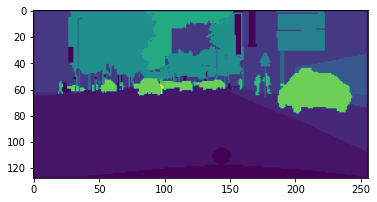

In [46]:
import numpy as np

img_array = np.load(r'D:\PyTorch\Project_6_CityScapes_Segmentation\input\archive\data\train\label\5.npy')


from matplotlib import pyplot as plt

plt.imshow(img_array)
plt.show()

In [51]:
import torch
import torchvision
from glob import glob
import torch.nn as nn
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torchvision.transforms as transform
from torch.utils.data import DataLoader,Dataset
from torch.utils.tensorboard import SummaryWriter
from torchvision.utils import make_grid
lossfunc = nn.MSELoss()

In [52]:
class MyDataset(torch.utils.data.Dataset):
    
    def __init__(self, images_path ,img_dir, transform_img=None ,transform_label=None):
        
        self.images_path = images_path
        self.transform_img = transform_img
        self.transform_label = transform_label
        self.dir = img_dir

    def __len__(self):
        return len(self.images_path)

    def __getitem__(self, idx):
        
        img = plt.imread(os.path.join(self.dir, self.images_path[idx]))
        image,label = img[:,:int(img.shape[1]/2)],img[:,int(img.shape[1]/2):]
    
        if self.transform_img:
            image = self.transform_img(image)
            
        if self.transform_label:
            label = self.transform_label(label)
            
        return image, label

In [53]:
mytransformsImage = transform.Compose(
    [
        transform.ToTensor(),
        #transform.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        transform.RandomHorizontalFlip(p=0.9)
    ]
)

mytransformsLabel = transform.Compose(
    [
        transform.ToTensor(),
    ]
)

In [64]:
# train dataset
traindata = MyDataset(files_train, voc_dir_train, mytransformsImage, mytransformsLabel)
# val dataset
valdata = MyDataset(files_test, voc_dir_test, mytransformsImage, mytransformsLabel)

In [65]:
batch_size = 4
train_loader = DataLoader(traindata,batch_size)
vaild_loader = DataLoader(valdata,1)

In [71]:
def show(img,output,label,denorm = False):
    img,output,label = img.cpu(),output.cpu(),label.cpu()
    fig,ax = plt.subplots(len(output),3,figsize=(10,10))
    
    for i in range(len(output)):
        if(len(output) == 3):
            Img,Lab,act = img[i],output[i],label[i]
            Img,Lab,act = Img,Lab.detach().permute(1,2,0).numpy(),act
            ax[i][0].imshow(Img.permute(1,2,0))
            ax[i][1].imshow(Lab)
            ax[i][2].imshow(act.permute(1,2,0))
        else:
            Img,Lab,act = img[i],output[i],label[i]
            Img,Lab,act = Img,Lab.detach().permute(1,2,0).numpy(),act
            ax[0].imshow(Img.permute(1,2,0))
            ax[1].imshow(Lab)
            ax[2].imshow(act.permute(1,2,0))
    plt.show()

In [35]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [36]:
device

'cuda'

In [41]:
im, lab = next(iter(train_loader))

In [43]:
im.shape, lab.shape

(torch.Size([4, 3, 256, 256]), torch.Size([4, 3, 256, 256]))

In [55]:
net(im).shape

torch.Size([4, 5, 256, 256])

In [60]:
lossfunc

MSELoss()

In [ ]:
num_epochs, lr, wd, devices = 15, 0.001, 1e-3, d2l.try_all_gpus()
trainer = torch.optim.SGD(net.parameters(), lr=lr, weight_decay=wd)
d2l.train_ch13(net, train_iter, test_iter, loss, trainer, num_epochs, devices)

In [82]:
from tqdm import tqdm

train_acc = []
val_acc = []
train_loss = []
val_loss = []
model = net
epochs = 10
lossfunc = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())
train_loader = train_iter
vaild_loader = test_iter
device = 'cuda' if torch.cuda.is_available() else 'cpu'

for i in range(epochs):
    
    trainloss = 0
    valloss = 0
    
    for img,label in tqdm(train_loader):
        '''
            Traning the Model.
        '''
        optimizer.zero_grad()
        img = img.to(device)
        label = label.to(device)
        output = model(img)
        loss = lossfunc(output,label)
        loss.backward()
        optimizer.step()
        trainloss+=loss.item()
    
#     if(i%5==0):
#         show(img,output,label)

    train_loss.append(trainloss/len(train_loader))    
  
    for img,label in tqdm(vaild_loader):
        '''
            Validation of Model.
        '''
        img = img.to(device)
        label = label.to(device)
        output = model(img)
        loss = lossfunc(output,label)
        valloss+=loss.item()
        
    val_loss.append(valloss/len(vaild_loader))  
    
    print("epoch : {} ,train loss : {} ,valid loss : {} ".format(i,train_loss[-1],val_loss[-1]))

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:01<00:00, 30.69it/s]


epoch : 0 ,train loss : 0.6001443450515335 ,valid loss : 0.6014028287702992 


100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:01<00:00, 30.03it/s]


epoch : 1 ,train loss : 0.5968872605143367 ,valid loss : 0.6006971578444203 


100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:01<00:00, 28.62it/s]


epoch : 2 ,train loss : 0.5962043794425758 ,valid loss : 0.5971920547946807 


100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:01<00:00, 29.77it/s]


epoch : 3 ,train loss : 0.5952365975122194 ,valid loss : 0.5990479338553644 


100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:01<00:00, 29.84it/s]


epoch : 4 ,train loss : 0.5946784467310519 ,valid loss : 0.5969422075056261 


100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:01<00:00, 30.21it/s]


epoch : 5 ,train loss : 0.5932107200493684 ,valid loss : 0.5971353380910812 


100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:01<00:00, 30.16it/s]


epoch : 6 ,train loss : 0.5920784431534845 ,valid loss : 0.5962615205395606 


100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:01<00:00, 29.95it/s]


epoch : 7 ,train loss : 0.5924875069308926 ,valid loss : 0.5972570565439039 


100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:01<00:00, 30.19it/s]


epoch : 8 ,train loss : 0.5908635033143533 ,valid loss : 0.5951734588992211 


100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:01<00:00, 30.39it/s]

epoch : 9 ,train loss : 0.590199334556992 ,valid loss : 0.5940336892681737 


In [93]:
output.shape

torch.Size([16, 3, 224, 224])

In [94]:
label.shape

torch.Size([3, 256, 256])

In [95]:
img.shape

torch.Size([16, 3, 224, 224])

In [77]:
output[0].shape

torch.Size([3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


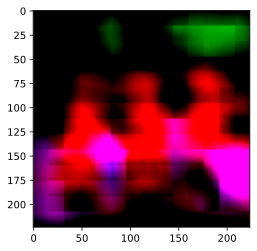

In [88]:
plt.imshow(output[0].permute(1, 2, 0).detach().cpu())

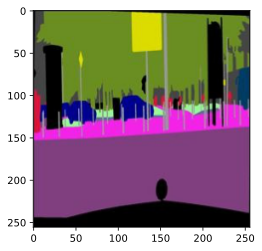

In [92]:
plt.imshow(label.permute(1, 2, 0).detach().cpu())